<a href="https://colab.research.google.com/github/karelbecerra/sam-x-ray-medical-images-hand-sex-classification/blob/main/google-colab/training_enhanced_hand_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kaggle_datasets_path = kagglehub.dataset_download('karelbecerra/sam-x-ray-medical-images-hand-sex-classification')

print('Data source import complete.')


100%|██████████| 2.55G/2.55G [00:36<00:00, 75.0MB/s]

Extracting files...


Data source import complete.


# Prepare notebook environment
> This notebook is for the intention of having an easy start process. You can find more '**production ready**' code for **training** and **inference** into **/classification** repository folder.


Notebook requeriments:
* Install public packages
* Import public packages
* Clone code repository
* Setup working folders
* Link Kaggle dataset to Code repository

In [2]:
# Install public packages
!pip install munch

# Import public packages
import os
import sys
import numpy as np
from torchsummary import  summary

In [3]:
# Clone repository. After cloning, code will be available in **/kaggle/working/** folder
## Remove local clone if already exist
!rm -rf ./sam-x-ray-medical-images-hand-sex-classification
!git clone https://github.com/karelbecerra/sam-x-ray-medical-images-hand-sex-classification.git

## Move /classification to output root
!mv ./sam-x-ray-medical-images-hand-sex-classification/classification classification

## Removing all extra (we need only /classification folder)
!rm -rf ./sam-x-ray-medical-images-hand-sex-classification

Cloning into 'sam-x-ray-medical-images-hand-sex-classification'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 168 (delta 67), reused 93 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (168/168), 8.18 MiB | 12.19 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [4]:
# Setup working folders
troncho_base = './classification'
os.chdir(troncho_base)
sys.path.append(troncho_base)

In [5]:
# Link Kaggle dataset to Code repository

# Configs in repository '**/classification/configs**' are expecting to find dataset on '**./datasets**' folders.
# Therefore we need to link Kaggle datasets to ./datasets folder.

# Create a symbolic link
# Define the target and the link name
target = kaggle_datasets_path + "/enhanced_hand_data"
link_name = "./datasets/enhanced_hand_data"

# Create a symbolic link
os.symlink(target, link_name)

# List content
os.listdir('./datasets/enhanced_hand_data')

['tst_masked_he_400x300.npz',
 'val_masked_he_400x300.npz',
 'tra_masked_he_400x300.npz']

# Training Process
* Import local functions
* Load parameters: Find more in ./configs folders. Parameters include:
  * Augmentations
  * Learning Rate
  * Initial model weights
  * and more...
* Load dataset: setup dataset loaders
* Build model
* Train

In [6]:
# Import local methods, functions and models (from github repository)
from src.utils import tools
from src.trainer import train_model
from src.loaddataset import load_datasets
from src.buildmodel import build_model
from src.utils import config

In [7]:
# Load parameters
parameters = config.load_parameters(config='enhanced_hand_data', batch=24, epochs=25, run='run1' )

In [8]:
# Load dataset
train_loader, valid_loader, train_dataset_size = load_datasets(parameters=parameters)

In [9]:
# Build model
model, device = build_model(parameters)
#summary(model,input_size=(3,400,200))

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 74.7MB/s]


In [ ]:
# Train model
tools.print_now("START TRAINING")
train_model(parameters=parameters, model=model, device=device, train_loader=train_loader, valid_loader=valid_loader, train_dataset_size=train_dataset_size)
tools.print_now("END TRAINING -- ")

START TRAINING elapsed = 0:00:00  parcial = 0:00:00   now 2024-12-13 21:23:25 
####################################################################################################################
Train - epoch: 0/25 - 521/521 [==============================] - 145.795s -  - loss  0.3078 - 
Validation - 59/59 [==============================] - 5.469s - - loss  0.5329 - 
       #### NEW BEST MODEL ####
Train - epoch: 1/25 - 521/521 [==============================] - 143.018s -  - loss  0.2996 - 
Validation - 59/59 [==============================] - 6.096s - - loss  0.3541 - 
       #### NEW BEST MODEL ####
Train - epoch: 2/25 - 500/521 [===========================>..] - 136.147s -  - loss  0.3865 - 

# Results
After training, best model weights are saved into /classification/output/models: enhanced_hand_data_run1.pth

In [12]:
# List content
os.listdir('./output/models')

['enhanced_hand_data_run1.pth', '.gitignore']

# Plots
Loss and accuracy history can be found in ./classification/output/trace: **enhanced_hand_data_run1.csv**

Epochs: 2
Best epoch (regarding validation accuracy) 2, training accuracy: 0.8089, validation accuracy: 0.8340
Best epoch (regarding validation loss) 2, training loss: 0.4281, validation loss: 0.3624


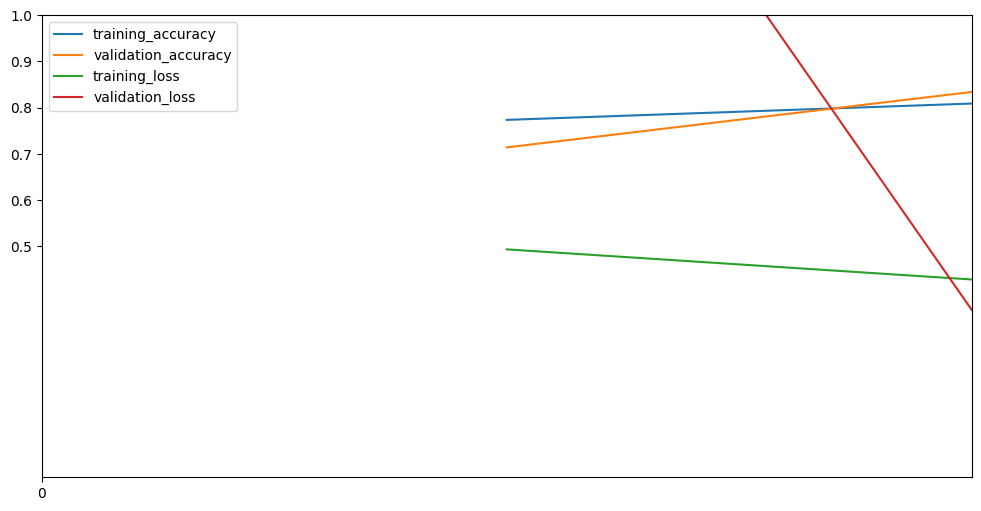

In [13]:
from stats import trace
trace.plot('output/trace/enhanced_hand_data_run1.csv', print_out=True)